<a href="https://colab.research.google.com/github/aselshall/ML_Redtide_Example/blob/main/Redtide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Example 2: Red tide classification problem (large bloom, no bloom)
Decision trees with python (scikit-learn, and graphviz)

In [38]:
#General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



#ML
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

!pip install catboost
from catboost import CatBoostClassifier


from sklearn.exceptions import ConvergenceWarning
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz
import pydotplus
import joblib

#Plotting
import seaborn as sns
import matplotlib.pyplot as plt


     |████████████████████████████████| 76.3 MB 1.3 MB/s 


In [2]:
from pathlib import Path
import random

import gdown
from pathlib import Path
Path('Input').mkdir(parents=True, exist_ok=True)
Path('Output').mkdir(parents=True, exist_ok=True)
file='maze_data.csv'
file_ID='1z7Y7cDHtWhKmAbFNl0ABlMp3NOA2fVQr'
url='https://drive.google.com/uc?id='

print('Input files download')
source=url+file_ID
destination='Input/{}'.format(file)
print('from {} to {}'.format(source,destination))
gdown.download(source, destination, quiet=True)

Input files download
from https://drive.google.com/uc?id=1z7Y7cDHtWhKmAbFNl0ABlMp3NOA2fVQr to Input/maze_data.csv


'Input/maze_data.csv'

In [3]:
df=pd.read_csv('Input/maze_data.csv')
#display(df) 

#### [2] Clean and prepare data

In [4]:
# Predictor variables
X=df.drop(columns=['index','bloom','output'])
#display(X)

#Target variable(or label, or predictand)
y=df.output
#display(y)

#### [3] Split data 

In [44]:
# Predictor variables
X=df.drop(columns=['index','bloom','output'])
#display(X)

#Target variable(or label, or predictand)
y=df.output
#display(y)

#Split to train and test
test_size=0.2
n_dataset=200
X_train=np.empty(shape=(n_dataset, int(X.shape[0]*(1-test_size)),X.shape[1]), dtype=int)
X_test=np.empty(shape=(n_dataset, int(X.shape[0]*test_size),X.shape[1]), dtype=int)
y_train=np.empty(shape=(int(X.shape[0]*(1-test_size)),n_dataset), dtype=object)
y_test=np.empty(shape=(int(X.shape[0]*test_size),n_dataset), dtype=object)
for x in range(n_dataset):
  X_train[x,:,:], X_test[x,:,:], y_train[:,x], y_test[:,x] =train_test_split(X,y,test_size=test_size)
print('X_train', X_train.shape,'X_test', X_test.shape,'y_train', y_train.shape,'y_test', y_test.shape)

X_train (200, 48, 6) X_test (200, 12, 6) y_train (48, 200) y_test (12, 200)


#### [4] Create, train, evaluate and save model 

In [45]:
models=['DecisionTree', 'RandomForest', 'KNeighbors', 'SupportVectorC_linear', 'SupportVectorC_gamma', \
        'GaussianProcess', 'GaussianNaiveBayes','QuadDiscriminantAnalysis', 'MultilayerPerceptron', 'AdaBoost', \
        'XGBoost','CatBoost']


n_realization=5
n_model=len(models)
Score=np.empty(shape=(n_dataset*n_realization,n_model))

for mmodel in range(n_model):
  print(models[mmodel])
  # Define model: decision treee  
  if mmodel==0:
    model=DecisionTreeClassifier()
  elif mmodel==1:
    model=RandomForestClassifier()
  elif mmodel==2:
    model=KNeighborsClassifier()
  elif mmodel==3:
    model=SVC(kernel="linear", C=0.025)
  elif mmodel==4:
    model=SVC(gamma=2, C=1)
  elif mmodel==5:
    model=GaussianProcessClassifier(1.0 * RBF(1.0))
  elif mmodel==6:
    model=GaussianNB()
  elif mmodel==7:
    model=QuadraticDiscriminantAnalysis()
  elif mmodel==8:
    model=MLPClassifier()
  elif mmodel==9:
    model=AdaBoostClassifier()
  elif mmodel==10:
    model = XGBClassifier()
  elif mmodel==11:
    model = CatBoostClassifier(verbose = False)
  
  cont=0
  best_score=0
  for x in range(n_dataset):
    for y in range(n_realization):
      #Train model 
      model.fit(X_train[x,:,:],y_train[:,x])

      #Make predictions
      y_pred=model.predict(X_test[x,:,:])

      #Evalaute predictions
      #fine tune the model, choose another algorithm or model, or application<br>
      #Accuracy:size_train_dataset, clean data (duplicates, missing data), irrelevent data
      score=accuracy_score(y_test[:,x],y_pred)
      Score[cont,mmodel]=score
      cont=cont+1
      if score>best_score:
        best_score=score
        print(x,y,'Accuracy: {:0.2f}'.format(score))

      #Save model to a file 
      #joblib.dump(model,'Redtide_Bloom_Pred.joblib')

print(np.mean(Score, axis=0))

DecisionTree
0 0 Accuracy: 1.00
RandomForest
0 0 Accuracy: 0.92
0 3 Accuracy: 1.00
KNeighbors
0 0 Accuracy: 0.92
SupportVectorC_linear
0 0 Accuracy: 0.92
5 0 Accuracy: 1.00
SupportVectorC_gamma
0 0 Accuracy: 0.92
5 0 Accuracy: 1.00
GaussianProcess
0 0 Accuracy: 0.92
5 0 Accuracy: 1.00
GaussianNaiveBayes
0 0 Accuracy: 0.42
1 0 Accuracy: 0.75
16 0 Accuracy: 0.83
QuadDiscriminantAnalysis
0 0 Accuracy: 0.67
5 0 Accuracy: 1.00
MultilayerPerceptron
0 0 Accuracy: 0.92
0 4 Accuracy: 1.00
AdaBoost
0 0 Accuracy: 0.92
XGBoost
0 0 Accuracy: 0.92
40 0 Accuracy: 1.00
CatBoost
0 0 Accuracy: 0.92
5 0 Accuracy: 1.00
[0.66875    0.69975    0.71166667 0.78708333 0.74791667 0.77083333
 0.50458333 0.65666667 0.69716667 0.71791667 0.70833333 0.72041667]


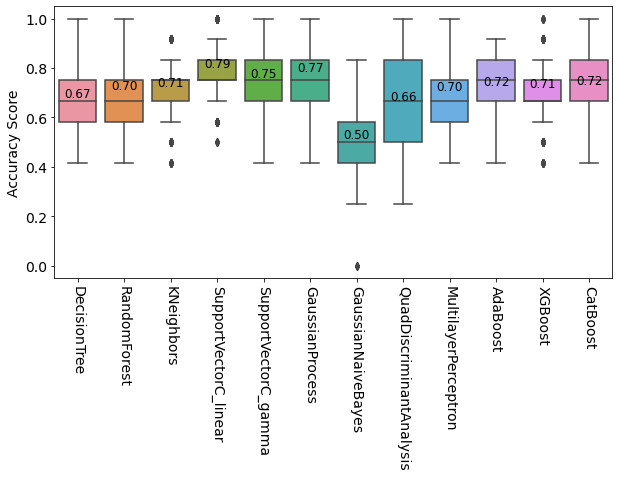

In [79]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
g=sns.boxplot(data=Score,ax=ax)


medians = np.mean(Score, axis=0)
vertical_offset = np.mean(Score, axis=0)*0.02
fontsize=14
for xtick in g.get_xticks():
    g.text(xtick,medians[xtick] + vertical_offset[xtick],'%.2f'%(medians[xtick]), \
           horizontalalignment='center',size=12,color='k')


g.set_xticklabels(models)


ax.tick_params(axis='x', rotation=270,labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)
plt.ylabel("Accuracy Score",fontsize=fontsize)
fig.savefig('Figure2_ML.png',bbox_inches='tight')



#### [5] Model interpretation
https://towardsdatascience.com/understanding-decision-trees-for-classification-python-9663d683c952<br>
Plot decision tree starting from root+decision node, to decision node, and to terminal node (leaf).<br>
Pure node means further spliting will not lead to further information gain, so classification trees do noy split on pure nodes.However, impure nodes can split further.<br>
The figure shows that setosa was correctly classified for all 12 points.The right side shows that many points are misclassified as no_bloom.<br>
Classification trees are a greedy algorithm which mean
s by default it will continue to split until it has a pure node.<br> 
The algorithm chooses the best split point (i.e., gini) for the impure node.<br>
Decision trees split on the feature that results in the largest information gain (e.g., gini or entropy criterion).<br>
IG = information before splitting (parent) — information after splitting 
If the impurity criterion is not zero then we can furthr split.

Season: (1) fall (dark blue) , (2) winter (light blue),
(3) spring (green), (4) summer (red) <br>
SSH: (-1) Loop Current South, (1) Loop Current North in the Gulf of Mexico <br>
wind_os: Off-shore wind speed (-1) below average, (0) average, (1) above average <br>
wind_as_ Along-shre wind speed (-1) below average, (0) average, (1) above average <br>
river_ch: Caloosahatchee river outflow (-1) below average, (1) above average <br>
river_pc: Peace River outflow (-1) below average, (1) above average <br>

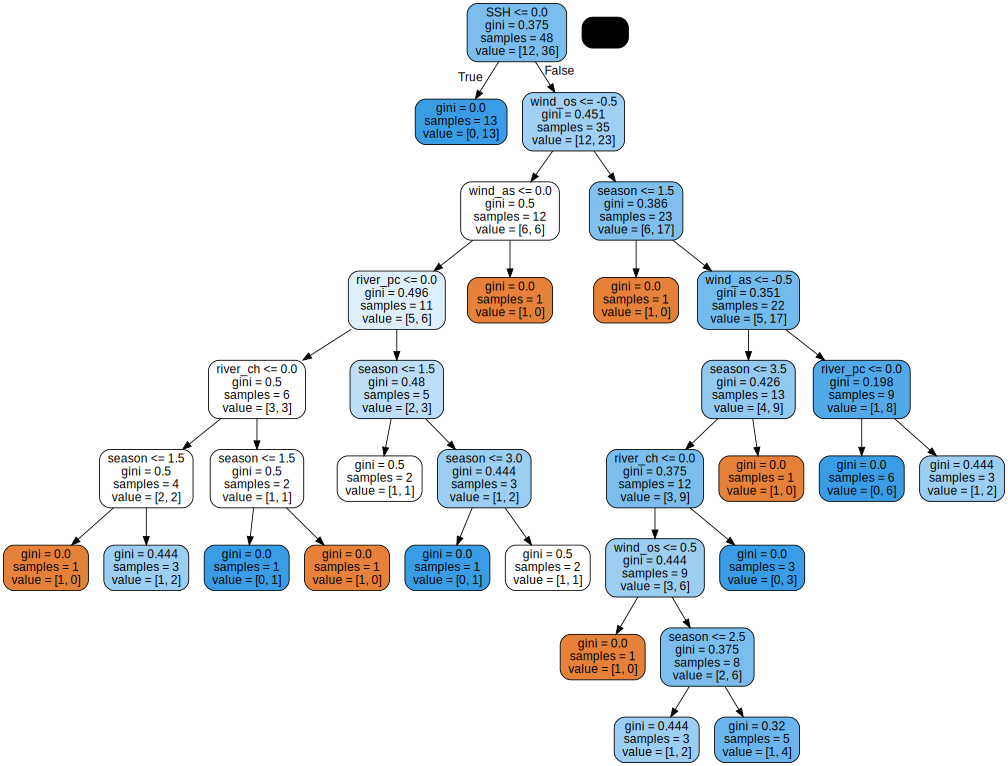

In [92]:
#load model from a file
model=DecisionTreeClassifier()
model.fit(X_train[0,:,:],y_train[:,0])
joblib.dump(model,'Redtide_Bloom_Pred.joblib')
model=joblib.load('Redtide_Bloom_Pred.joblib')


#Export model in visual format (to know how the model makes predictions)
dot_data=tree.export_graphviz(model,out_file=None, max_depth=None,label='all',rounded=True,filled=True,
                     feature_names=['season','SSH','river_ch','river_pc','wind_os','wind_as'])

#pydot to resize and saving 
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"14,14!"')

#graphviz for screen display 
graphviz.Source(pydot_graph.to_string())

